# In-sensor reservoir computing for language learning via two-dimensional memristors

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
# Load data
data = pd.read_excel("./data.xlsx")

# convert S -> nS (conductance)
data *= 1E9

## Make train dataset

In [3]:
# Standard_deviation = 0.1

train_data_01 = pd.DataFrame()

for i in range (0,5) :
    data0 = pd.DataFrame({'LETTER' : np.random.normal(i, 0, size=100)})
    data1 = pd.DataFrame({'CELL1' : np.random.normal(np.mean([np.max(data.iloc[5*i+0]), np.min(data.iloc[5*i+0])]), 0.1, size=100)})
    data2 = pd.DataFrame({'CELL2' : np.random.normal(np.mean([np.max(data.iloc[5*i+1]), np.min(data.iloc[5*i+1])]), 0.1, size=100)})
    data3 = pd.DataFrame({'CELL3' : np.random.normal(np.mean([np.max(data.iloc[5*i+2]), np.min(data.iloc[5*i+2])]), 0.1, size=100)})
    data4 = pd.DataFrame({'CELL4' : np.random.normal(np.mean([np.max(data.iloc[5*i+3]), np.min(data.iloc[5*i+3])]), 0.1, size=100)})
    data5 = pd.DataFrame({'CELL5' : np.random.normal(np.mean([np.max(data.iloc[5*i+4]), np.min(data.iloc[5*i+4])]), 0.1, size=100)})
    
    train_data_01 = pd.concat([train_data_01, pd.concat([data0, data1, data2, data3, data4, data5],axis=1)])

display(train_data_01)

train_data_01.to_csv("train_data_01.csv",encoding="CP949",index=False)

,LETTER,CELL1,CELL2,CELL3,CELL4,CELL5
0,0.0,63.290979,63.719292,54.919618,59.458200,60.176896
1,0.0,63.000192,63.805790,54.852935,59.356986,59.969840
2,0.0,63.220521,63.725293,54.976435,59.387415,60.077566
3,0.0,63.152533,63.668298,54.977065,59.287140,60.277930
4,0.0,63.113557,63.793264,54.733004,59.331859,60.080836
...,...,...,...,...,...,...
95,4.0,63.232063,62.315031,54.921845,58.871090,59.691754
96,4.0,63.187598,62.172206,54.932343,58.706952,59.524466
97,4.0,63.177844,62.111796,54.902791,58.844350,59.566675
98,4.0,63.332666,62.241894,55.089140,58.826776,59.614569


## Graph of data distribution (Train dataset)

In [4]:
total_data = pd.DataFrame()

for i in range (0,5) :
    total = train_data_01[100*i:100*(i+1)]
    total = pd.melt(total, value_vars=['CELL1', 'CELL2', 'CELL3', 'CELL4', 'CELL5'])
    total_data = pd.concat([total_data, total], axis=1)
    
display(total_data)

,variable,value,variable,value,variable,value,variable,value,variable,value
0,CELL1,63.290979,CELL1,64.283952,CELL1,64.041236,CELL1,62.358670,CELL1,63.265743
1,CELL1,63.000192,CELL1,63.987562,CELL1,63.990110,CELL1,62.256860,CELL1,63.378415
2,CELL1,63.220521,CELL1,64.002605,CELL1,63.870008,CELL1,62.322882,CELL1,63.101900
3,CELL1,63.152533,CELL1,64.044138,CELL1,63.967301,CELL1,62.391559,CELL1,63.315902
4,CELL1,63.113557,CELL1,64.292170,CELL1,63.979366,CELL1,62.347934,CELL1,63.335503
...,...,...,...,...,...,...,...,...,...,...
495,CELL5,60.259929,CELL5,58.928753,CELL5,57.991011,CELL5,59.527380,CELL5,59.691754
496,CELL5,59.900182,CELL5,58.903555,CELL5,58.074435,CELL5,59.485321,CELL5,59.524466
497,CELL5,59.994427,CELL5,58.886771,CELL5,58.184806,CELL5,59.397144,CELL5,59.566675
498,CELL5,60.161322,CELL5,58.690978,CELL5,57.969789,CELL5,59.287138,CELL5,59.614569


/home/kimyj/.conda/envs/py37_yj/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/kimyj/.conda/envs/py37_yj/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/kimyj/.conda/envs/py37_yj/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

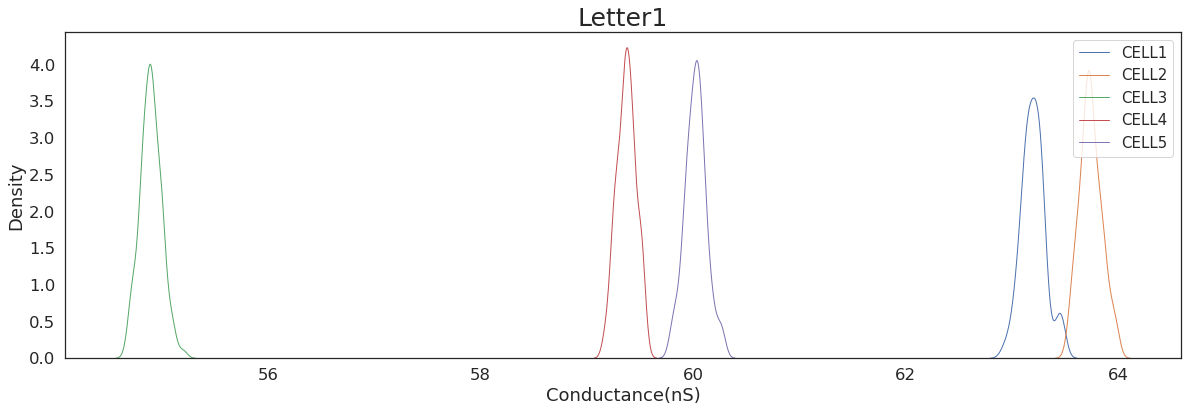

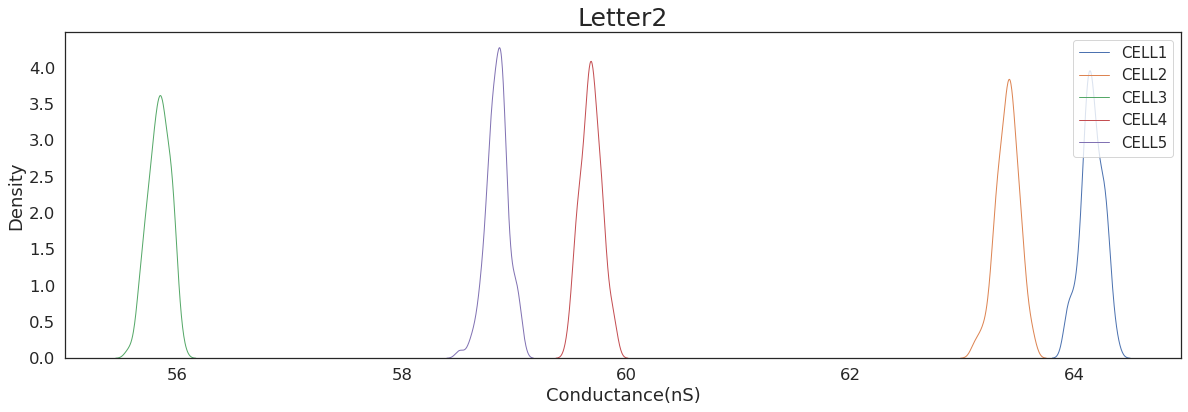

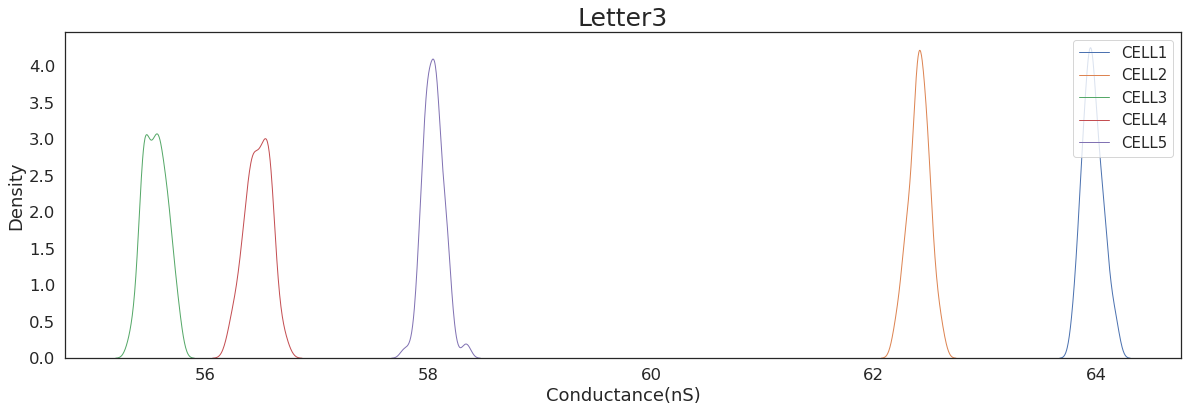

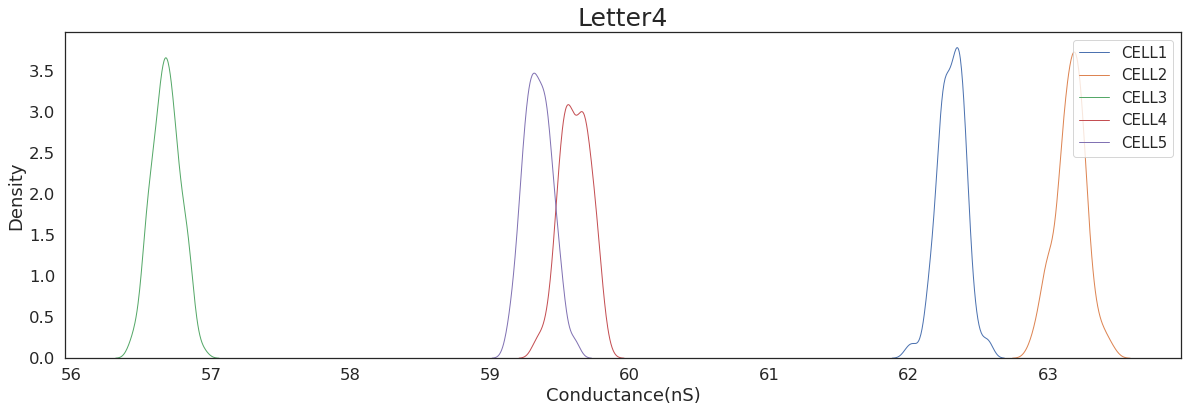

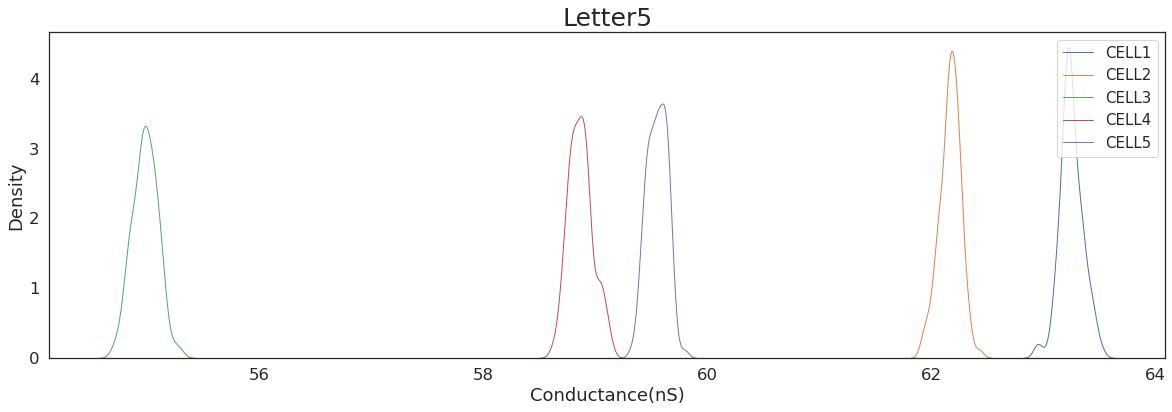

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 


for i in range(0,5) :
    
    Cells = ['CELL1', 'CELL2', 'CELL3', 'CELL4', 'CELL5']
    plt.figure(figsize = (20, 6))    
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    sns.set_style("white")    
    
    for Num in Cells :
        subset = total_data.iloc[:,(2*i):(2*(i+1))][total_data.iloc[:,(2*i):(2*(i+1))]['variable'] == Num]

        sns.distplot(subset['value'], hist = False, kde = True,
                    kde_kws = {'linewidth' : 1},
                    label = Num)   

    #plt.title('Standard deviation = 0.1', fontsize=25)
    plt.title('Letter'+str(i+1), fontsize=25)    
    plt.legend(fontsize = 15, loc='upper right')
    plt.xlabel('Conductance(nS)', fontsize = 18) 

## Make test dataset

In [6]:
# Standard_deviation = 0.1

test_data_01 = pd.DataFrame()

for i in range (0,5) :
    data0 = pd.DataFrame({'LETTER' : np.random.normal(i, 0, size=100)})
    data1 = pd.DataFrame({'CELL1' : np.random.normal(np.mean([np.max(data.iloc[5*i+0]), np.min(data.iloc[5*i+0])]), 0.1, size=100)})
    data2 = pd.DataFrame({'CELL2' : np.random.normal(np.mean([np.max(data.iloc[5*i+1]), np.min(data.iloc[5*i+1])]), 0.1, size=100)})
    data3 = pd.DataFrame({'CELL3' : np.random.normal(np.mean([np.max(data.iloc[5*i+2]), np.min(data.iloc[5*i+2])]), 0.1, size=100)})
    data4 = pd.DataFrame({'CELL4' : np.random.normal(np.mean([np.max(data.iloc[5*i+3]), np.min(data.iloc[5*i+3])]), 0.1, size=100)})
    data5 = pd.DataFrame({'CELL5' : np.random.normal(np.mean([np.max(data.iloc[5*i+4]), np.min(data.iloc[5*i+4])]), 0.1, size=100)})
    
    test_data_01 = pd.concat([test_data_01, pd.concat([data0, data1, data2, data3, data4, data5],axis=1)])

display(test_data_01)

test_data_01.to_csv("test_data_01.csv",encoding="CP949",index=False)

,LETTER,CELL1,CELL2,CELL3,CELL4,CELL5
0,0.0,63.277805,63.770400,54.849777,59.416115,59.994542
1,0.0,63.139954,63.904146,54.953938,59.146170,60.057417
2,0.0,63.039290,63.642848,54.911160,59.427659,60.181492
3,0.0,63.101450,63.799386,54.718431,59.523377,59.984561
4,0.0,63.160574,63.646697,54.818915,59.201620,59.964971
...,...,...,...,...,...,...
95,4.0,63.199639,61.988246,55.158199,58.885546,59.736319
96,4.0,63.222266,62.220684,54.868311,58.879385,59.847067
97,4.0,63.388263,62.217198,54.971047,58.862943,59.508226
98,4.0,63.325175,62.233008,54.858559,58.793602,59.632523


## Graph of data distribution (Test dataset)

In [7]:
total_data2 = pd.DataFrame()

for i in range (0,15) :
    total2 = test_data_01[100*i:100*(i+1)]
    total2 = pd.melt(total2, value_vars=['CELL1', 'CELL2', 'CELL3', 'CELL4', 'CELL5'])
    total_data2 = pd.concat([total_data2, total2], axis=1)
    
display(total_data2)

,variable,value,variable,value,variable,value,variable,value,variable,value,...,variable,value,variable,value,variable,value,variable,value,variable,value
0,CELL1,63.277805,CELL1,64.180678,CELL1,63.819356,CELL1,62.370755,CELL1,63.193453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CELL1,63.139954,CELL1,64.016639,CELL1,64.028397,CELL1,62.229268,CELL1,63.296502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CELL1,63.039290,CELL1,64.125958,CELL1,64.097489,CELL1,62.287624,CELL1,63.211888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CELL1,63.101450,CELL1,64.167162,CELL1,64.010711,CELL1,62.239969,CELL1,63.185687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CELL1,63.160574,CELL1,64.257459,CELL1,63.995261,CELL1,62.351331,CELL1,63.225421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CELL5,59.916207,CELL5,58.890831,CELL5,57.865572,CELL5,59.332493,CELL5,59.736319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,CELL5,60.150917,CELL5,58.934438,CELL5,57.980815,CELL5,59.539608,CELL5,59.847067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,CELL5,60.262497,CELL5,58.777413,CELL5,58.033973,CELL5,59.271104,CELL5,59.508226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,CELL5,60.146595,CELL5,58.800242,CELL5,58.066874,CELL5,59.533151,CELL5,59.632523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/kimyj/.conda/envs/py37_yj/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/kimyj/.conda/envs/py37_yj/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/kimyj/.conda/envs/py37_yj/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

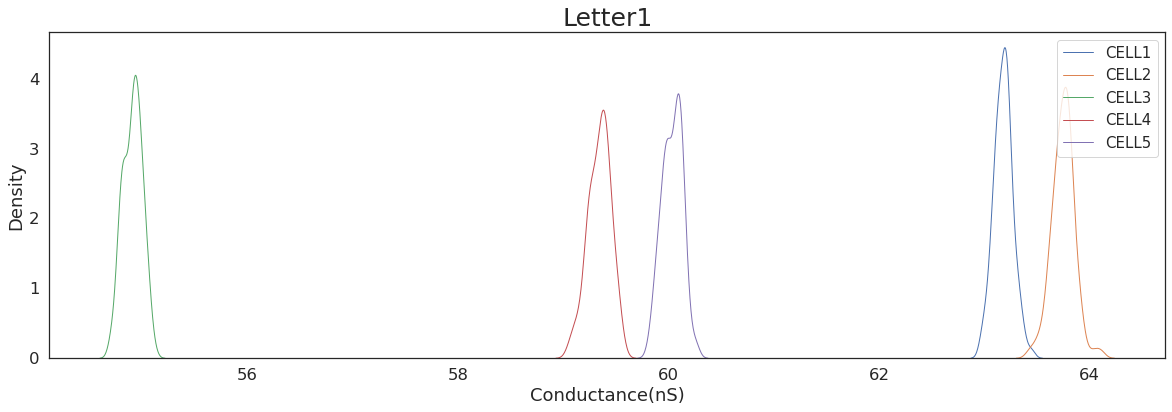

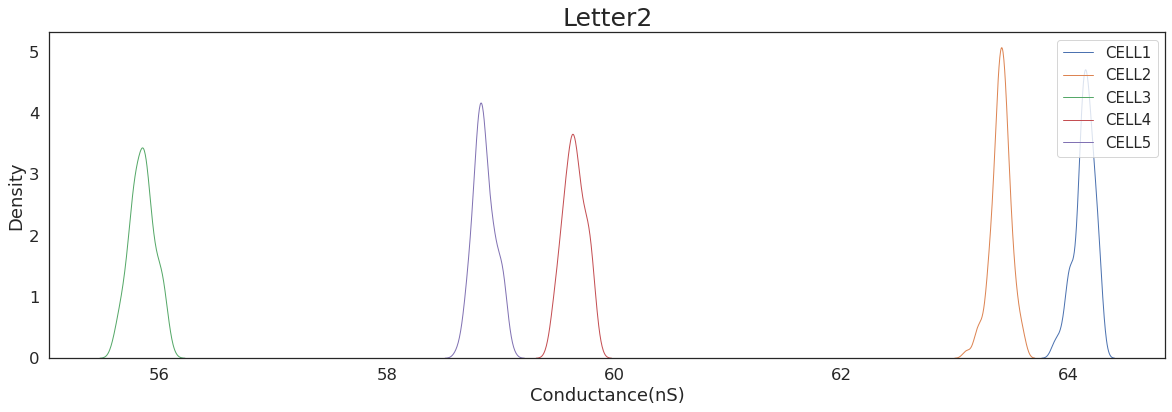

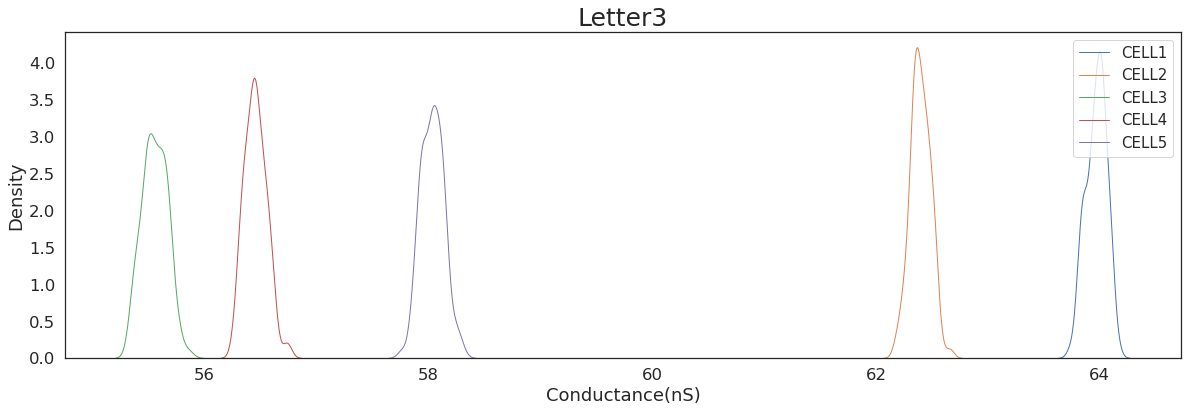

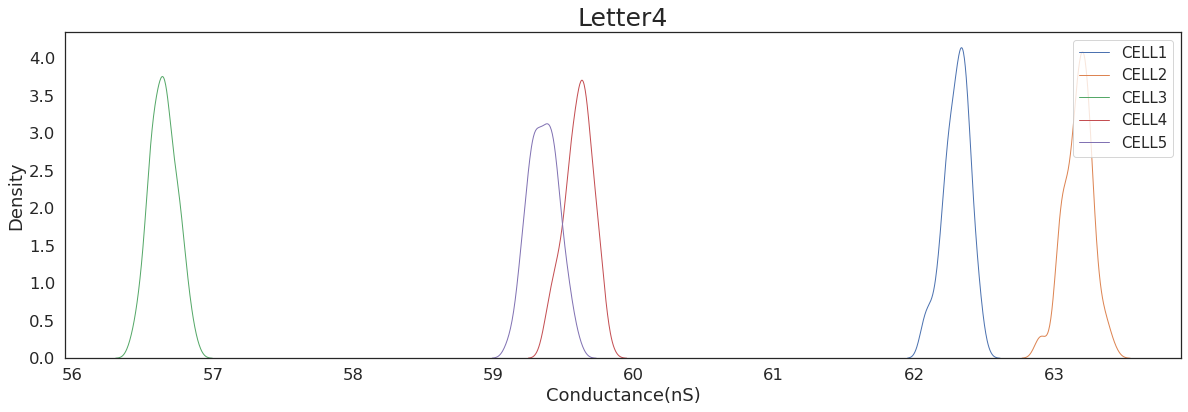

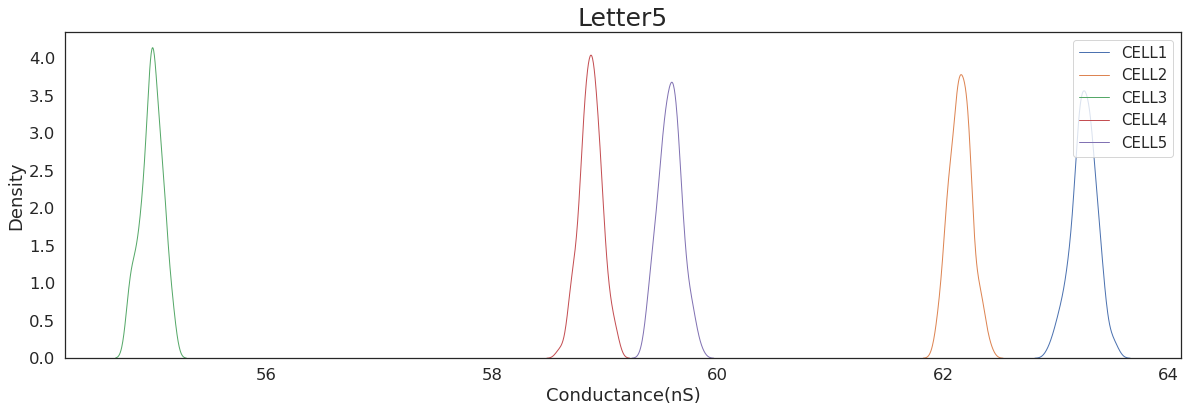

In [8]:
for i in range(0,5) :
    
    Cells = ['CELL1', 'CELL2', 'CELL3', 'CELL4', 'CELL5']
    plt.figure(figsize = (20, 6))
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    sns.set_style("white")
    
    for Num in Cells :
        subset = total_data2.iloc[:,(2*i):(2*(i+1))][total_data2.iloc[:,(2*i):(2*(i+1))]['variable'] == Num]

        sns.distplot(subset['value'], hist = False, kde = True,
                    kde_kws = {'linewidth' : 1},
                    label = Num)

    #plt.title('Standard deviation = 0.1', fontsize=25)
    plt.title('Letter'+str(i+1), fontsize=25)    
    plt.legend(fontsize = 15, loc='upper right')
    plt.xlabel('Conductance(nS)', fontsize = 18)